<div style="border:solid lightseagreen 3px; padding: 20px">
<div>    
<p><font color="black" >
Привет! Меня зовут Мария Четырева, и я буду делать ревью твоего проекта. Давай будем общаться на «ты». 
По ходу твоего решения я буду оставлять комментарии, обрати внимание на их цвет.</font></p>
</div>

<div class="alert alert-success">

<b>✔️</b> Зеленым цветом отмечены удачные и элегантные решения, на которые можно опираться в будущем.

</div>

<div class="alert alert-warning">

<b>⚠️</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Это не критичные ошибки, исправление которых остается на твое усмотрение. Однако постарайся, чтобы после твоих доработок их было не больше 3.

</div>

<div class="alert alert-danger">

<b>❌</b> Красным цветом отмечены критичные ошибки, без исправления которых проект не будет принят.

</div>

<p>Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:

<div class="alert alert-info">
<b>Комментарий студента:</b> Ок
<br>
</div>
    
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее. </p>

</div>

<div style="border:solid lightseagreen 3px; padding: 20px">
<div>
<b>Общий комментарий ревьюера: </b>
   
 Мне понравилась твоя работа! Ты уверенно используешь pandas, помнишь об основных шагах предобработки данных. Однако в работе есть некоторые критические замечания. Особенно обрати внимание на формулировку гипотез и выводов по результатам их проверки и убедись, что все ячейки проекта запускаются.
   Исправь и присылай на повторное ревью. Удачи!  

</div>
    
    
<div class="alert alert-danger">

<b>❌ Комментарий ревьюера v2</b> Все еще есть ошибки. Перепроверь формулировки гипотез во всех тестах, постаралась поподробнее объяснить. Также есть ошибка с получением "очищенных" данных. Если тебе вдруг что-то непонятно, то оставляй комментарий, и я помогу. Жду твоих исправлений
</div>
  
    
 <div class="alert alert-danger">

<b>❌ Комментарий ревьюера v3</b> Подсказала по поводу ошибок. Присылай на повторное ревью.
</div>
  


<img src="https://i.ibb.co/vZtG5zL/image.jpg" width=450 height=450 />

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Неудобно читается столбец с названием гипотезы. Это можно исправить, установив параметр функции display(): 
pd.options.display.max_colwidth = число_символов (например, 100)
</div>

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [7]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = pd.to_datetime(orders['date'])

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Здорово, что приводишь типы данных

</div>

In [11]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [12]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера </b> А как же проверка на дубликаты?

</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

In [16]:
hypothesis.duplicated().sum()

0

In [17]:
visitors.duplicated().sum()

0

In [18]:
orders.duplicated().sum()

0

In [19]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [20]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [21]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [22]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [23]:
hypothesis.sort_values('ICE', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00


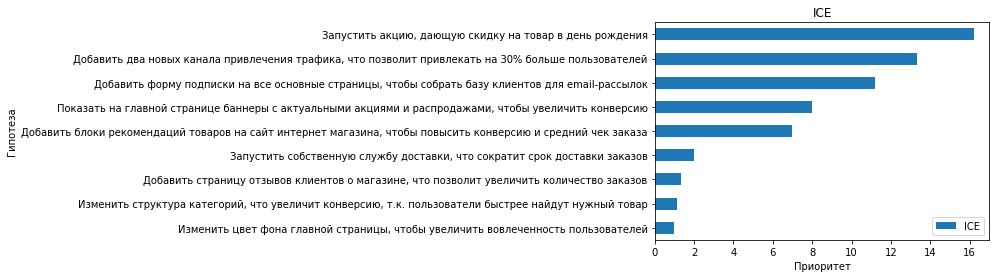

In [24]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [25]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [26]:
hypothesis.sort_values('RICE', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20


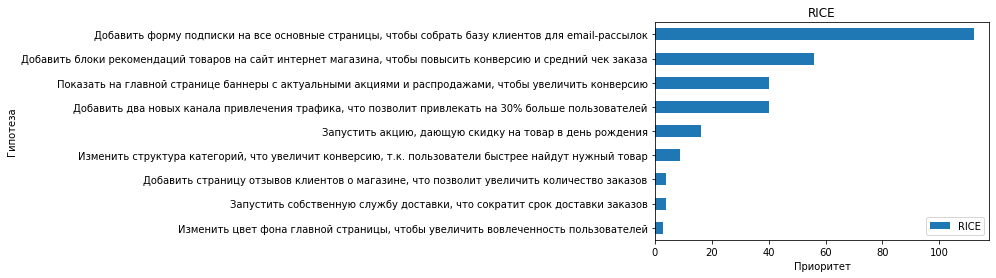

In [27]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

Приоритизация разная, так как одна формула учитывает охват, а другая нет

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> И правда, при использовании RICE мы учитываем охват и приоритеты гипотез могут измениться

</div>

## Часть 2. Анализ A/B-теста

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> На данном этапе принято проверять, а нет ли таких аномальных пользователей, которые попали в обе группы. Будет здорово, если ты учтешь это в своих будущих проектах

</div>

In [28]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))\
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [29]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [30]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [31]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [32]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.79",0.03
1,2019-08-01,B,21,20,101217,713,"4,819.86",0.03
2,2019-08-02,A,44,39,242401,1338,"5,509.11",0.03
3,2019-08-02,B,45,43,266748,1294,"5,927.73",0.03
4,2019-08-03,A,68,63,354874,1845,"5,218.74",0.04


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

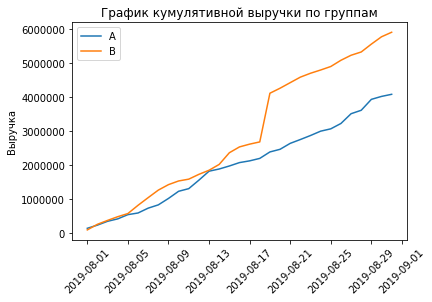

In [33]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A')
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Группа В выше Группы А. Возможно есть аномальные выбросы в группе В(выбросы)

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Да, учитывая одинаковые темпы роста групп, момент скачка на графике скорее всего свидельствует о появлении нескольких дорогих заказов

</div>

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

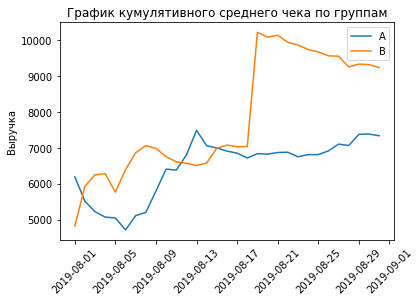

In [34]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Группа В снова резко поднимается и делает резкий скачок

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Значение среднего чека после скачка начинает приходить в норму, но еще далеко от стабилизации. 

</div>

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

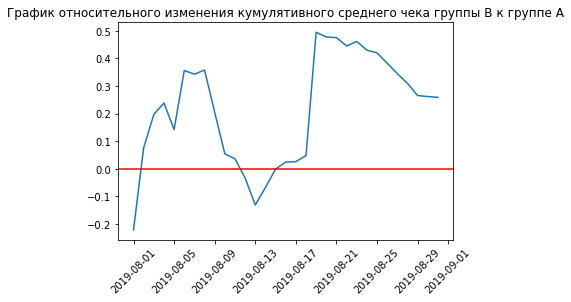

In [35]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

Такая же картина и те же проблемы с группой В

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

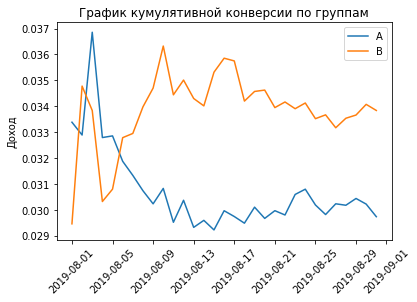

In [36]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Доход")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Конверсии обеих групп после пика колеблются в районе 0.029 - 0.033. Конверсия группы В выглядит стабильнее

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

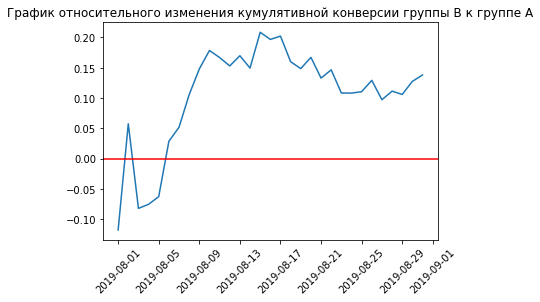

In [37]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

Конверсия группы В выглядит хорошо, но период теста небольшой

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> С середины теста отличие конверсии группы B относительно конверсии группы A снижается и, возможно, уже стабилизировалось.

</div>

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [38]:
orders_per_user = orders.groupby(['visitor_id', 'group'], as_index=False).agg({'transaction_id':'nunique'}).rename(columns={'transaction_id':'orders'})

In [39]:
orders_per_user.head()

,visitor_id,group,orders
0,5114589,B,1
1,6958315,B,1
2,8300375,A,1
3,8300375,B,1
4,11685486,A,1


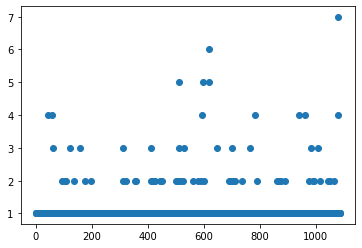

In [40]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'])
plt.show()

В основном делают не более 2 заказов, но также есть пользователи, которые сделали более 10 заказов

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [41]:
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

95 перцентиль: 2.00
99 перцентиль: 4.00


Граница аномальных пользователей - 99 перцентиль

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

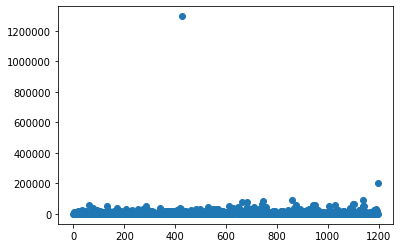

In [42]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

Здесь можно наблюдать 2 аномальных выброса. Самый аномальный выброс - более 1200000 рублей

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Было бы неплохо посмотреть на график и в увеличенном масштабе, не считая эти два супер дорогих заказа
</div>

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [43]:
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 28000.00
99 перцентиль: 58233.20


Граница аномальных заказов - 99 перцентиль

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [44]:
conversion = (orders.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [45]:
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.03
1,B,640,18916,0.03


In [46]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha=0.05
#purchases = np.array(conversion['orders'])
#leads = np.array(conversion['visitors'])
#p1 = purchases[0] / leads[0]
#p2 = purchases[1] / leads[1]
#combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
#difference = p1-p2
#z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
#distr = st.norm(0,1)
#p_value = (1 - distr.cdf(abs(z_value))) * 2
results = st.mannwhitneyu(conversion[conversion['group']=='A']['conversion'], conversion[orders['group']=='B']['conversion'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<div class="alert alert-danger">

<b>❌ Комментарий ревьюера </b> Давай для конверсии тоже использовать тест Манна-Уитни, чтобы посмотреть на схожесть самих выборок. 
</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера </b> Также данная ячейка вообще не запускается
</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера v2: </b> Ошибка в формулировке гипотез. Н0 формулируется как отсутствие различий, отсутствие влияния фактора, равенство средних и тд. Т.е. твои формулировки перепутаны местами

</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v3:</b> 👍

</div>

In [47]:
conversion['check_conversion'] = conversion['conversion'] * 100
conversion

,group,orders,visitors,conversion,check_conversion
0,A,557,18736,0.03,2.97
1,B,640,18916,0.03,3.38


Статистическая занчимость присутствует, так как конверсия группы В гораздо выше, но гипотезы нам показали, что конверсия А равна конверсии В. Возможно есть ошибки в данных

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [48]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A РАВЕН среднему чеку группы B
# H1: Средний чек A НЕ РАВЕН среднему чеку группы B
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-danger">

<b>❌ Комментарий ревьюера: </b> Помни, что нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства 

</div>

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера v2: </b> Все еще ошибка в формулировке гипотез

</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v3:</b> 👍

</div>

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера </b> Тоже не запускается
</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

Средний чек грппы A не превосходит средний чек группы B, но гипотезы нам показали, что средний чек А равен среднему чеку В

In [49]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [50]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Лучше также выводить и относительную разницу чеков:
(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100    
 
</div>

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера: </b> Сейчас для расчета конверсии ты чистишь данные по кол-ву заказов, а для среднего чека по сумме заказа. Давай сразу посчитим их по обоим условиям

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Не могу понять как сюда добавить средний чек по сумме заказов. Нам ведь нужно браьт данные среднего чека обеих групп 7333 и 9230.875. Не могу понять как их сюда добавить. Также касательно гипотез. Почему я не могу добавить условие Превосходит и Не Превосходит? Ведь в пункте 2.13 с этим все окей. Просто условие с РАВНО получается странный вывод и данные не сходятся
<br>
</div>
    

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера v3: </b> В пункте 2.13 тоже неверно, надо исправить. Нулевая гипотеза это всегда знак равенства. Условие "не превосходит" это знак <=. Ты можешь формулировать гипотезы в виде Н0: средние чеки равны, H1: средний чек В больше чека А. Но тогда это будет односторонная гипотеза, и полученное значение p-value нужно будет дополнительно делить на два. Так что лучше делать простые формулировки равны/не равны. Какой странный вывод? Если ты имеешь ввиду, что мы видим большое различие в средних чеках, а тест говорит, что их нет, то здесь нет никакой ошибки. Для этого и проводится тест. Мы посчитали средние чеки и видим, что они существенно различаются. Но тест Манна-Уитни говорит нам, что есть большая вероятность того, что такая разница могла быть получена случайно: уж сильно похожи между собой выборки. Поэтому мы заключаем, что разница чеков статистически не значима.

</div>

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера v3</b> Нам нужно учесть два условия для аномальных пользователей: 
1) количество покупок >=4
    
2) сумма заказа > 58233
    
Для этого можно сначала определить id пользователей по первому условию, затем по второму, а потом объединить два списка, убрав повторяющиеся значения
</div>

In [51]:
#КОД РЕВЬЮЕРА
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > число_заказов]['userId'], ordersByUsersB[ordersByUsersB['orders'] > число_заказов]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > сумма_заказа]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

NameError: name 'ordersByUsersA' is not defined

In [ ]:
ordersByUsersA = orders_per_user[orders_per_user['group']=='A']
ordersByUsersB = orders_per_user[orders_per_user['group']=='B']

In [ ]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [ ]:
# Зачистим данные
orders_temp = orders[~orders['visitor_id'].isin(abnormalUsers)]
conversion_clear = (orders_temp.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion_clear['conversion'] = conversion_clear['orders'] / conversion_clear['visitors']

In [ ]:
conversion_clear

In [ ]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha=0.05
#purchases = np.array(conversion_clear['orders'])
#leads = np.array(conversion_clear['visitors'])
#p1 = purchases[0] / leads[0]
#p2 = purchases[1] / leads[1]
#combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
#difference = p1-p2
#z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
#distr = st.norm(0,1)
#p_value = (1 - distr.cdf(abs(z_value))) * 2
results = st.mannwhitneyu(conversion_clear[conversion_clear['group']=='A']['conversion'], conversion_clear[orders['group']=='B']['conversion'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера: </b> Тут тоже нужен Манна-Уитни

</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

Значит конверсия в группе В все еще выше

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [ ]:
orders_clear = orders.query('revenue <= 58233')

In [ ]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A РАВЕН среднему чеку группы B
# H1: Средний чек A НЕ РАВЕИ среднему чеку группы B
alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний чек группы А ниже среднего чека группы В

In [ ]:
orders_clear[orders_clear['group']=='A']['revenue'].mean()

In [ ]:
orders_clear[orders_clear['group']=='B']['revenue'].mean()

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Я думаю, что нужно продолжить тест, так как графики должны более менее выровниться и также мы получим больше данных. В качесвте результата можно считать, что фактически победу одерживает группа В

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> И все же, лидерство группы В по конверсии мы видим и по сырым, и по очищенным данным. А разницы в чеке нет. Поэтому особого смысла продолжать тест до стабилизации графиков нет и можно принять решение уже сейчас.
</div>